In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from matplotlib.pyplot import figure
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
df_csv_csv = pd.read_csv("Daten_Aufgabe_1 - Shopauswertung.csv",  delimiter=";")
df_csv_csv['Datum'] = pd.to_datetime(df_csv_csv.Datum, format='%d.%m.%Y')
df_csv_csv.head(3)

,Datum,Produkt,Umsatz
0,2021-01-01,A,17.132115
1,2021-01-02,A,57.353725
2,2021-01-03,A,114.746857


In [7]:
grouped = df_csv_csv.groupby('Produkt')

# Create a dictionary of DataFrames
data_frames = {group: frame for group, frame in grouped}

# Print the individual DataFrames
for group, frame in data_frames.items():
    print(f"DataFrame for category '{group}':")
    print(frame)
    print()


DataFrame for category 'A':
         Datum Produkt      Umsatz
0   2021-01-01       A   17.132115
1   2021-01-02       A   57.353725
2   2021-01-03       A  114.746857
3   2021-01-04       A  113.251181
4   2021-01-05       A    4.186462
..         ...     ...         ...
360 2021-12-27       A   48.681712
361 2021-12-28       A   54.774542
362 2021-12-29       A  151.450508
363 2021-12-30       A   39.406492
364 2021-12-31       A  111.467425

[365 rows x 3 columns]

DataFrame for category 'A+B+C':
          Datum Produkt        Umsatz
730  2021-01-01   A+B+C   18598.65588
731  2021-01-02   A+B+C   18809.41684
732  2021-01-03   A+B+C   19247.89036
733  2021-01-04   A+B+C   19511.08905
734  2021-01-05   A+B+C   20047.04458
...         ...     ...           ...
1090 2021-12-27   A+B+C  197909.24160
1091 2021-12-28   A+B+C  198014.84050
1092 2021-12-29   A+B+C  198355.27600
1093 2021-12-30   A+B+C  199081.44610
1094 2021-12-31   A+B+C  199213.85310

[365 rows x 3 columns]

DataFrame for 

In [9]:
df_a = data_frames['A']
df_a = df_a[['Datum', 'Umsatz']]
df_a.rename(columns={'Umsatz' : 'Umsatz_A'}, inplace=True)
df_a.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2704\609015164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a.rename(columns={'Umsatz' : 'Umsatz_A'}, inplace=True)


,Datum,Umsatz_A
0,2021-01-01,17.132115
1,2021-01-02,57.353725
2,2021-01-03,114.746857
3,2021-01-04,113.251181
4,2021-01-05,4.186462


In [10]:
df_b = data_frames['B']
df_b = df_b[['Datum', 'Umsatz']]
df_b.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)
df_b.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_2704\3038423765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)


,Datum,Umsatz_B
365,2021-01-01,189.467425
366,2021-01-02,286.467425
367,2021-01-03,346.467425
368,2021-01-04,441.467425
369,2021-01-05,445.467425


In [11]:
df_abc = data_frames['A+B+C']
df_abc = df_abc[['Datum', 'Umsatz']]
df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)
df_abc.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2704\2150676271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)


,Datum,Umsatz_ABC
730,2021-01-01,18598.65588
731,2021-01-02,18809.41684
732,2021-01-03,19247.89036
733,2021-01-04,19511.08905
734,2021-01-05,20047.04458


In [14]:
df_ab=df_a.merge(df_b, on='Datum')
df_ab.head()

,Datum,Umsatz_A,Umsatz_B
0,2021-01-01,17.132115,189.467425
1,2021-01-02,57.353725,286.467425
2,2021-01-03,114.746857,346.467425
3,2021-01-04,113.251181,441.467425
4,2021-01-05,4.186462,445.467425


In [15]:
df_abc=df_ab.merge(df_abc, on='Datum')
df_abc.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC
0,2021-01-01,17.132115,189.467425,18598.65588
1,2021-01-02,57.353725,286.467425,18809.41684
2,2021-01-03,114.746857,346.467425,19247.89036
3,2021-01-04,113.251181,441.467425,19511.08905
4,2021-01-05,4.186462,445.467425,20047.04458


In [16]:
df_abc['Umsatz_C']=df_abc['Umsatz_ABC'] - df_abc['Umsatz_B'] - df_abc['Umsatz_A']
df_abc.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC,Umsatz_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339
1,2021-01-02,57.353725,286.467425,18809.41684,18465.595689
2,2021-01-03,114.746857,346.467425,19247.89036,18786.676078
3,2021-01-04,113.251181,441.467425,19511.08905,18956.370443
4,2021-01-05,4.186462,445.467425,20047.04458,19597.390692


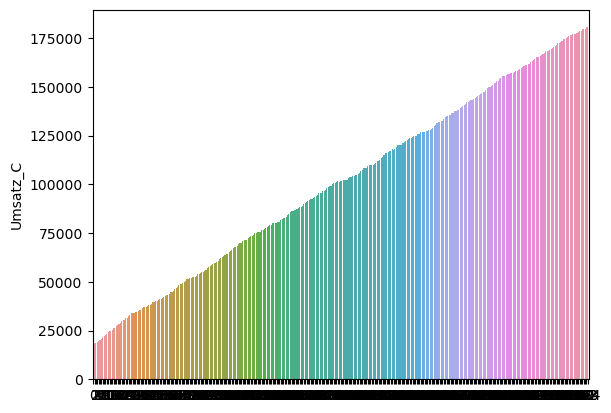

In [18]:
sns.barplot(x=df_abc.index, y=df_abc['Umsatz_C'], data=df_abc)

# Show the plot
plt.show()

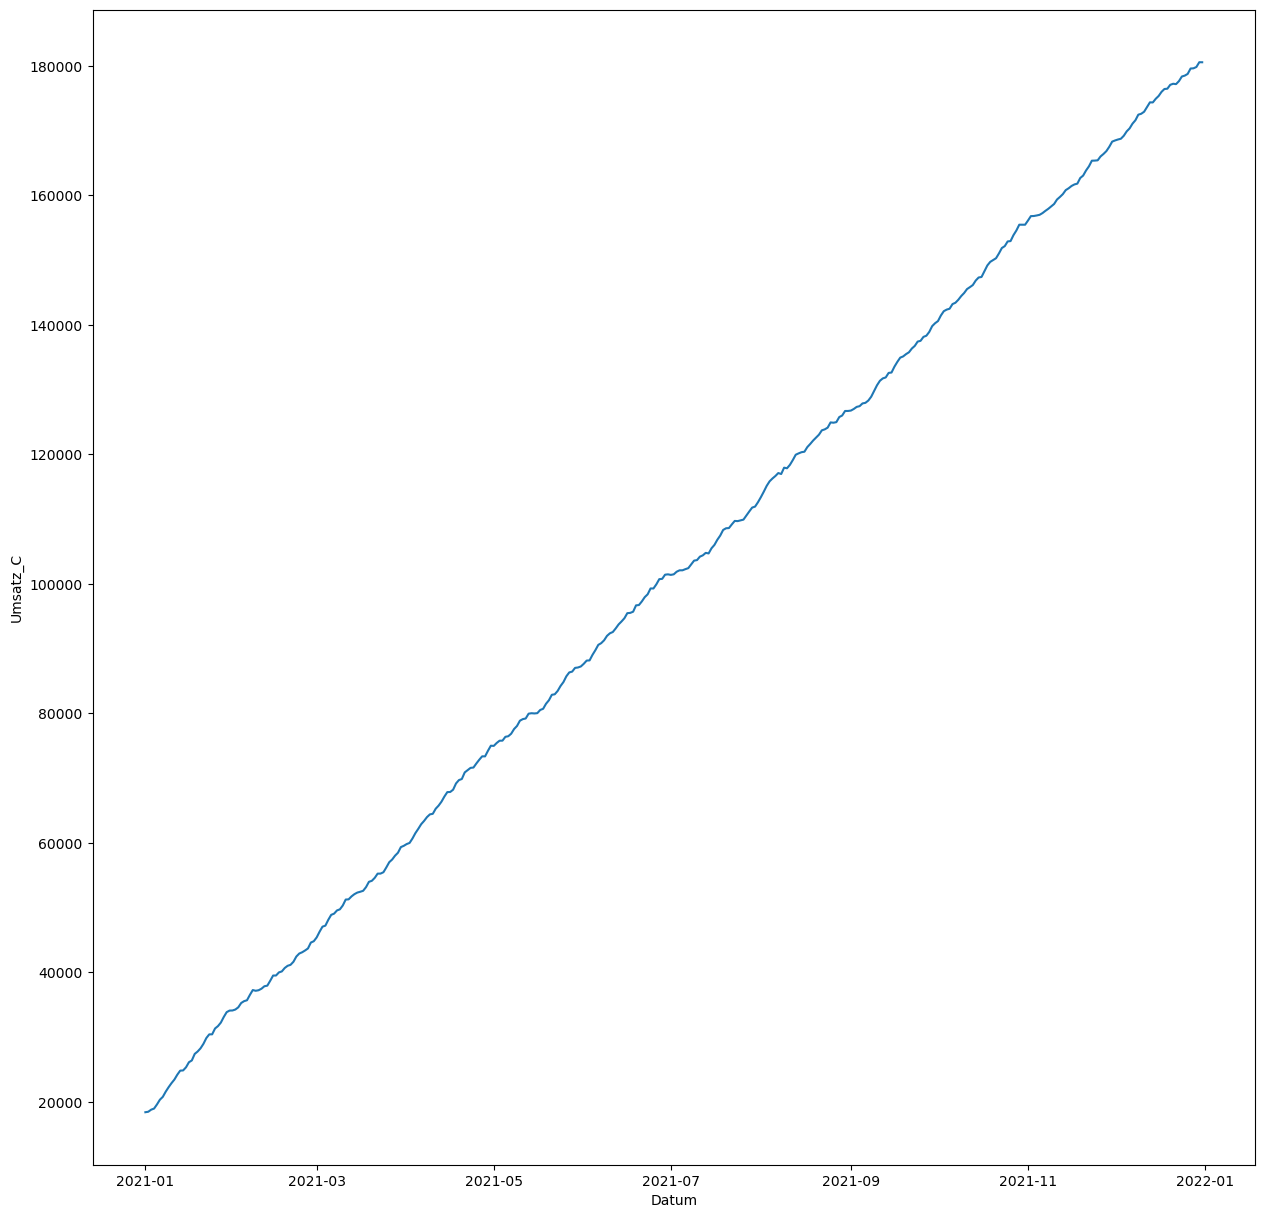

In [20]:
sns.lineplot(x=df_abc['Datum'], y=df_abc['Umsatz_C'], data=df_abc)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

In [21]:
df_abc['diff_C'] = df_abc['Umsatz_C'].diff().fillna(0)

df_abc.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC,Umsatz_C,diff_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339,0.000000
1,2021-01-02,57.353725,286.467425,18809.41684,18465.595689,73.539350
2,2021-01-03,114.746857,346.467425,19247.89036,18786.676078,321.080388
3,2021-01-04,113.251181,441.467425,19511.08905,18956.370443,169.694366
4,2021-01-05,4.186462,445.467425,20047.04458,19597.390692,641.020249


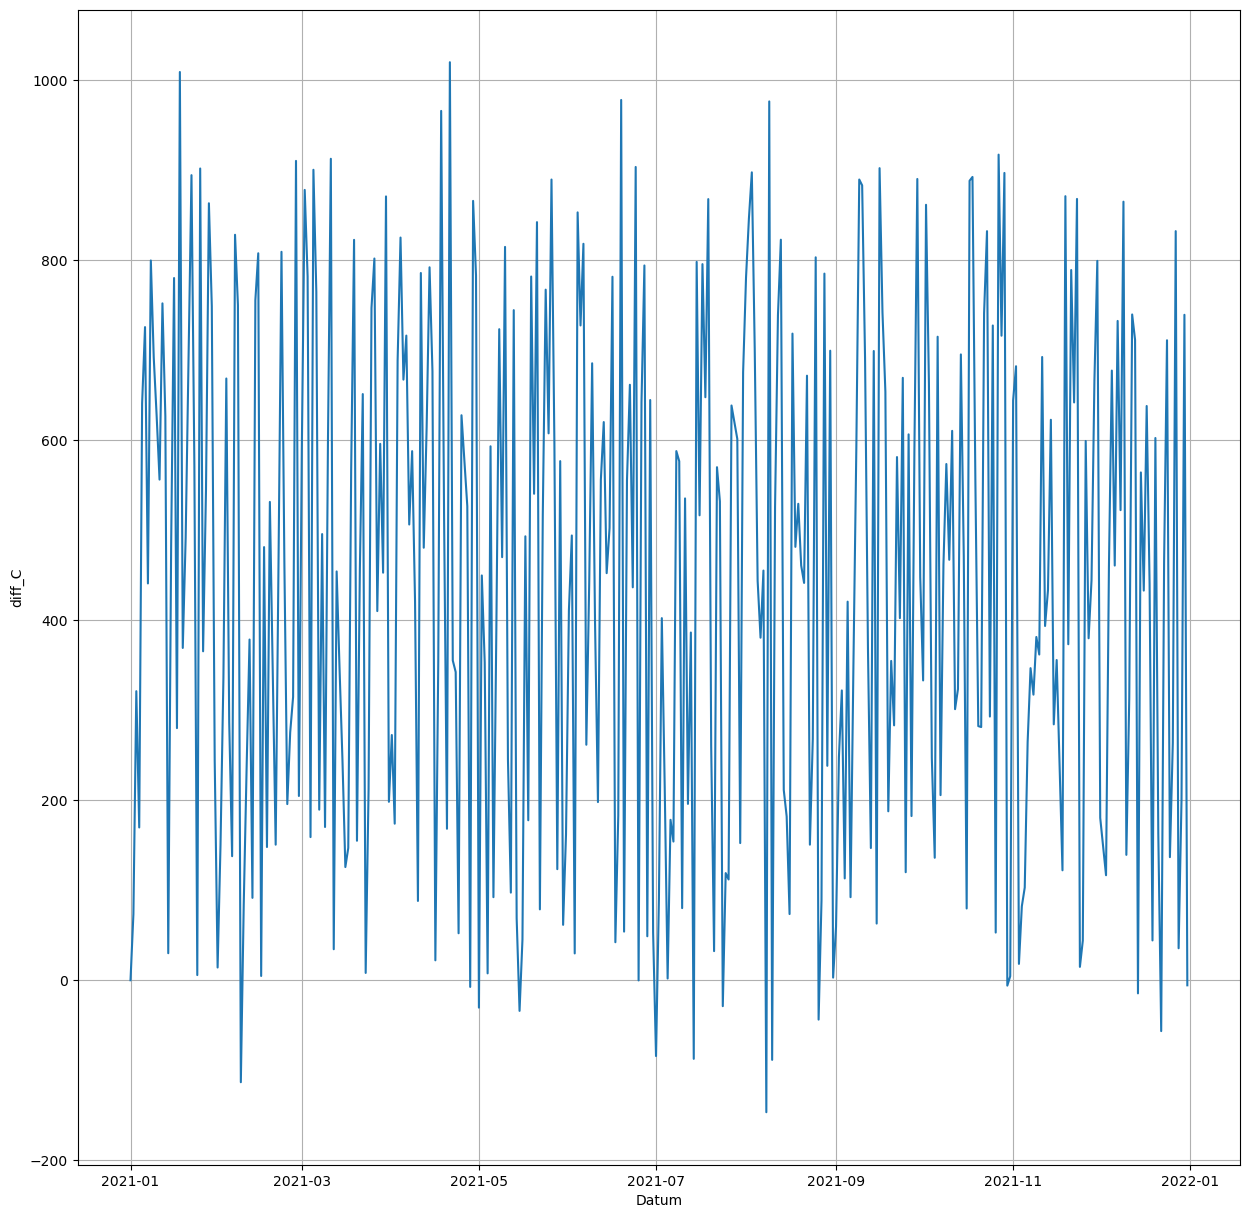

In [31]:
sns.lineplot(x=df_abc['Datum'], y=df_abc['diff_C'], data=df_abc)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
plt.grid()
plt.show()

In [28]:
df_abc_vordem = df_abc.copy()

df_abc_vordem['diff_C_vordem'] = df_abc_vordem['Umsatz_ABC'].diff().fillna(0)

df_abc_vordem.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC,Umsatz_C,diff_C,diff_C_vordem
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339,0.000000,0.00000
1,2021-01-02,57.353725,286.467425,18809.41684,18465.595689,73.539350,210.76096
2,2021-01-03,114.746857,346.467425,19247.89036,18786.676078,321.080388,438.47352
3,2021-01-04,113.251181,441.467425,19511.08905,18956.370443,169.694366,263.19869
4,2021-01-05,4.186462,445.467425,20047.04458,19597.390692,641.020249,535.95553


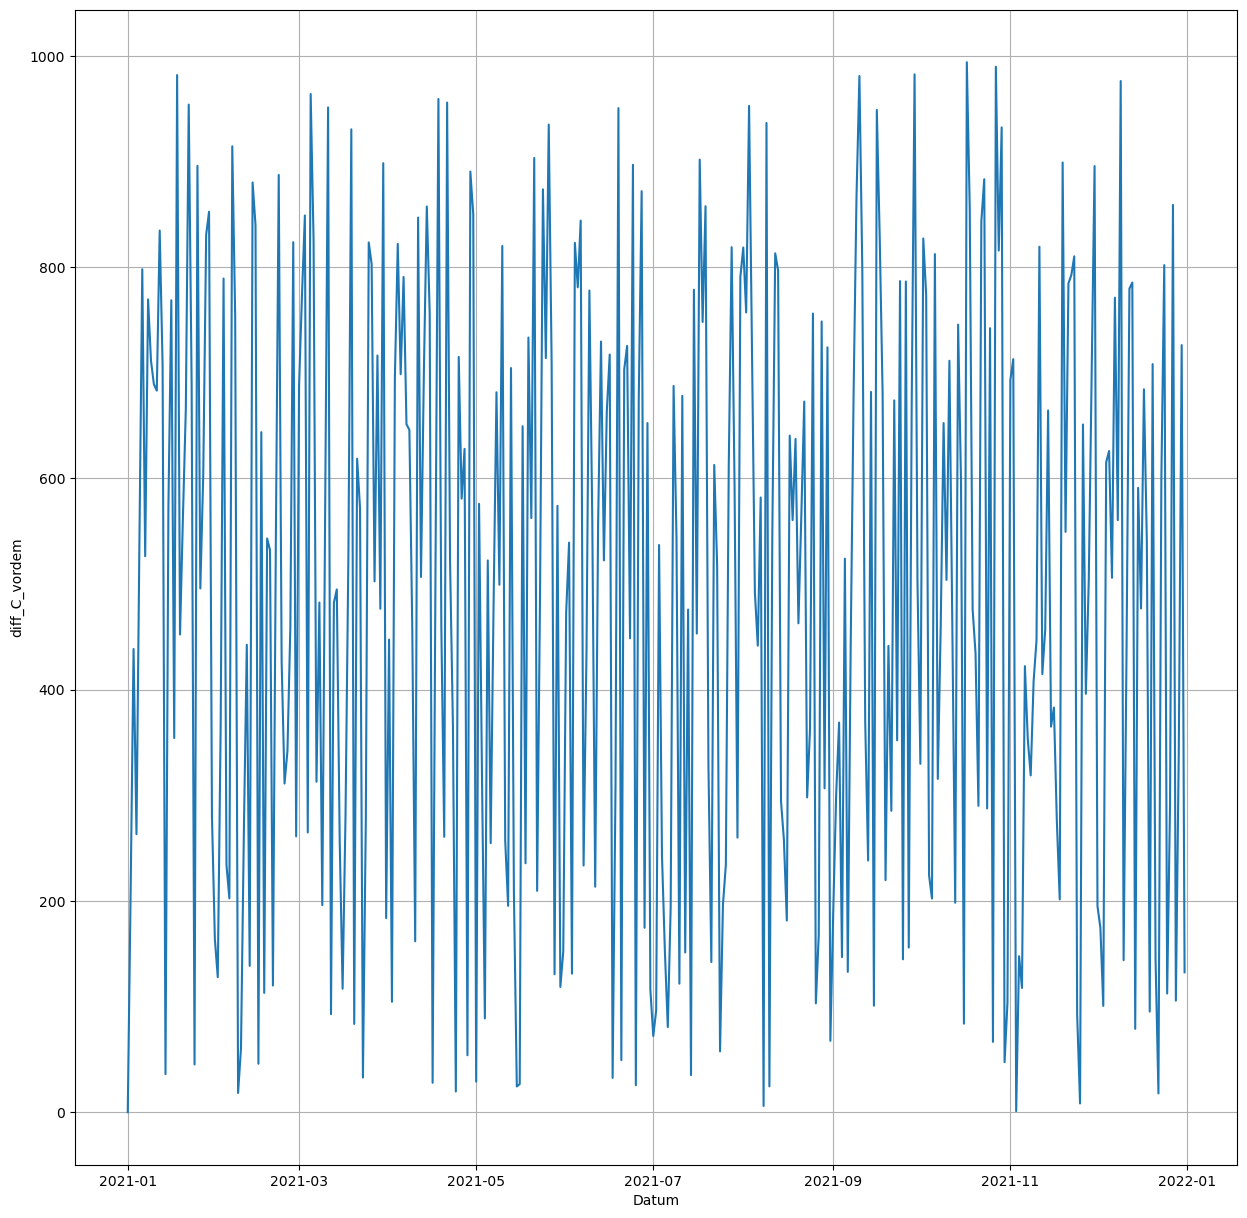

In [30]:
sns.lineplot(x=df_abc_vordem['Datum'], y=df_abc_vordem['diff_C_vordem'], data=df_abc_vordem)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
plt.grid()
plt.show()